# Example 4 — Rigid water number and polarisation densities

In this example, we examine the method for calculating three-dimensional densities of rigid water molecules (for instance, SPC/E water).  
When studying rigid water, we treat each molecule as a single body, as discussed in our [original publication](https://aip.scitation.org/doi/abs/10.1063/1.5111697).


In [1]:
from revelsMD import *
from revelsMD.revels_3D import Revels3D
import numpy as np
import matplotlib.pyplot as plt
from revelsMD.trajectory_states import MDATrajectoryState
import MDAnalysis as md
%matplotlib inline

Again, we generate a trajectory state. This is a case of an MDAnalysis trajectory state as we use a GROMACS trajectory. 

In [2]:
traj=MDATrajectoryState('../../../examples/example_4_rigid_water/prod.trr','../../../examples/example_4_rigid_water/prod.tpr')

In [3]:
traj.mdanalysis_universe.atoms[0]

<Atom 1: Ow of type OW of resname SOL, resid 1 and segid seg_0_SOL>

## Calculating a force based 3D density

The three-dimensional density part of the code is more involved than the RDF and requires the generation of two additional Python objects: a GridState (in which the calculation is performed), and a SelectionState (which contains indexing information for the species we are indexing). Here we have the simplest example possible and start by generating the grid state. If you use the trajectory included in this tutorial, there will only be 8000 frames — this is the bottom limit for getting something usable.

This example repeats the water density calculation performed in the original paper; however, in this example, we do not exclude the frozen water molecules, so a very strong peak will be located at the centre of mass of the molecule.

We start by generating a grid.

In [4]:
GS=Revels3D.GridState(traj,'number',nbins=200,temperature=300)

We move to making the force grid. The fast gridding method we use here is based on NumPy and performs well against the codes in standard libraries; however, it will give bad results for grids where multiple water molecules can be in a cell. As a general rule, a voxel should be no greater in volume than the excluded volume. If we don’t set a central atom, the molecule will be considered to be located at its centre of mass.

In [5]:
GS.make_force_grid(traj,['Ow','Hw1','Hw2'],kernel='triangular',rigid=True)

100%|██████████| 8000/8000 [00:24<00:00, 332.93it/s]


We follow this with the density calculation and then obtain the water solvation shell.

In [6]:
GS.get_real_density()

We then plot the number density of solvating waters around a central water molecule.

(75.0, 125.0)

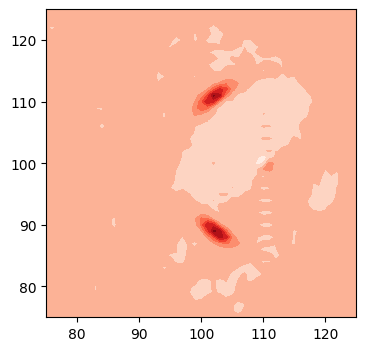

In [7]:
plt.figure(figsize=(4,4))
plt.contourf(GS.rho_force[:,:,100],cmap='Reds')
plt.ylim(75,125)
plt.xlim(75,125)

We can then write this to a cube file using `write_to_cube`, which we can visualise in VESTA.

In [9]:
import ase.io
GS.write_to_cube(ase.io.read('../../../examples/example_4_rigid_water/prod.gro')[-3:],GS.rho_force,'out.cube',convert_pmg=False)

## Calculating a polarisation density for a rigid water molecule

We then run the polarisation density in much the same way.

In [10]:
GSpol=Revels3D.GridState(traj,'polarisation',nbins=200,temperature=300)

In [11]:
GSpol.make_force_grid(traj,['Ow','Hw1','Hw2'],kernel='triangular',rigid=True)

100%|██████████| 8000/8000 [00:24<00:00, 320.47it/s]


In [12]:
GSpol.get_real_density()

We can then plot this as a colour map and write it out as a cube file for imaging (VESTA is good for this). In this case, the colour map is a bit poor as we’ve used a small trajectory to save on size. If you check VESTA, you can see all is well.

(75.0, 125.0)

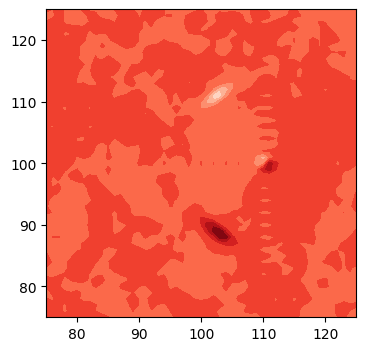

In [13]:
plt.figure(figsize=(4,4))
plt.contourf(GSpol.rho_force[:,:,100],cmap='Reds')
plt.ylim(75,125)
plt.xlim(75,125)

In [15]:
import ase.io
GS.write_to_cube(ase.io.read('../../../examples/example_4_rigid_water/prod.gro')[-3:],GSpol.rho_force,'outpol.cube',convert_pmg=False)